# Raising Awareness Of Air Pollution In Nigeria


## Importing necessary libraries for analysis



In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset and checking the data

In [3]:
# Load the dataset
air = pd.read_csv("/content/drive/MyDrive/AirQuality/Port Harcourt, Nigeria (4.80678 7.002953).csv")

In [4]:
# Preview the top of our data
air.head(10)

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84
5,2021-07-26 16:58:11 UTC,203,89,50,34.70
6,2021-07-26 17:00:08 UTC,204,89,51,33.83
7,2021-07-26 17:02:05 UTC,205,89,50,36.20
8,2021-07-26 17:04:02 UTC,206,89,50,32.63
9,2021-07-26 17:06:00 UTC,207,88,50,32.60


In [5]:
# Preview the bottom of our data
air.tail(10)

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
56042,2021-10-25 09:18:40 UTC,56240,86,62,28.88
56043,2021-10-25 09:20:40 UTC,56241,86,61,26.74
56044,2021-10-25 09:22:42 UTC,56242,87,61,28.71
56045,2021-10-25 09:24:44 UTC,56243,87,61,31.04
56046,2021-10-25 09:26:47 UTC,56244,87,61,28.90
56047,2021-10-25 09:28:43 UTC,56245,87,61,29.17
56048,2021-10-25 09:30:43 UTC,56246,87,61,29.57
56049,2021-10-25 09:32:44 UTC,56247,87,61,28.75
56050,2021-10-25 09:34:44 UTC,56248,87,61,29.97
56051,2021-10-25 09:36:44 UTC,56249,87,60,30.25


In [6]:
# Checking the shape of our data
air.shape

(56052, 5)

Our dataset has 56052 observations and 5 features/variables.

In [7]:
# Let's describe the data
air.describe()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
count,56052.000000,56052.000000,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926
std,16180.962981,4.319505,8.550730,42.205997
min,198.000000,70.000000,29.000000,0.780000
25%,14210.750000,82.000000,61.000000,30.170000
50%,28223.500000,84.000000,68.000000,41.450000
75%,42236.250000,87.000000,71.000000,61.190000
max,56249.000000,108.000000,89.000000,568.080000


The minimum and max value for the PM2.5 feature are too wide apart. The max and the 75% value are also too far apart as well. This leads to a suspicion of outliers present. We will check for these as we go through the project.

In [8]:
# Checking the info of our data
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       56052 non-null  object 
 1   entry_id         56052 non-null  int64  
 2   Temperature_F    56052 non-null  int64  
 3   Humidity_%       56052 non-null  int64  
 4   PM2.5_ATM_ug/m3  56052 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


The created_at column is an object, however this column's data points are date and time observations which we could transform and separate into date and time columns.

All the other columns are of numeric data type ie. int64 or float64

### Cleaning the data

In [9]:
# Let's check for missing values
air.isnull().sum().sum()

0

We have no null values in the dataset.

In [10]:
# Let's check for duplicates
air.duplicated().sum().sum()

0

There are no duplicated observations.

In [11]:
# Are there any unique values in each column entry in the dataset?
for i in air.columns:
 print(air[i].unique())
 print ("\n")

['2021-07-26 16:45:59 UTC' '2021-07-26 16:48:03 UTC'
 '2021-07-26 16:49:59 UTC' ... '2021-10-25 09:32:44 UTC'
 '2021-10-25 09:34:44 UTC' '2021-10-25 09:36:44 UTC']


[  198   199   200 ... 56247 56248 56249]


[ 89  88  87  86  85  84  83  82  81  78  90  91  92  93  94  96  95  97
  98  99 100 101 102  79  80  75  76  77 103  73 104 105 106  70  74 107
 108  72]


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 49 48 47 46 45 44
 43 42 41 40 39 38 37 36 35 34 33 30 29 31 32 68 70 71 72 69 86 85 84 83
 82 81 80 79 78 77 76 75 74 73 87 89 88]


[40.78 40.09 37.93 ... 83.85 80.34  6.64]




There are no unique values. This is because our data does not consist of categorical variables. All varaiables are continuous in nature and of date-time type.

(56052, 5)


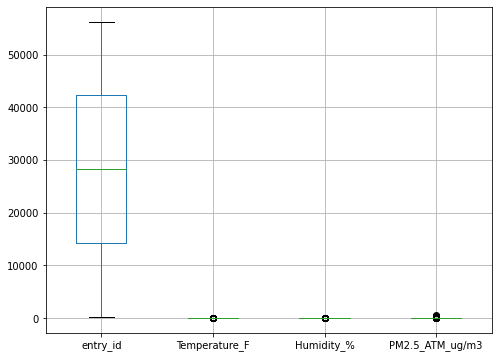

In [12]:
# checking for outliers 
air.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(air.shape)

In [13]:
# Let's check the ouliers present in the PM2.5 clearly 
# as the boxplot is not quite as clear.

# Checking for outliers in the PM2.5 column

Q1 = air["PM2.5_ATM_ug/m3"].quantile(0.25)
Q3 = air["PM2.5_ATM_ug/m3"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["PM2.5_ATM_ug/m3"] < Q1 - 1.5 * IQR) | (air["PM2.5_ATM_ug/m3"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    50004
True      6048
Name: PM2.5_ATM_ug/m3, dtype: int64

In [14]:
# Checking for outliers in the Temperature_F column

Q1 = air["Temperature_F"].quantile(0.25)
Q3 = air["Temperature_F"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["Temperature_F"] < Q1 - 1.5 * IQR) | (air["Temperature_F"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    54304
True      1748
Name: Temperature_F, dtype: int64

In [15]:
# Checking for outliers in the Humidity_% column

Q1 = air["Humidity_%"].quantile(0.25)
Q3 = air["Humidity_%"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["Humidity_%"] < Q1 - 1.5 * IQR) | (air["Humidity_%"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    54322
True      1730
Name: Humidity_%, dtype: int64

Seems that there are quite a number of outliers in the columns;

* PM2.5 column (6048 outlires)

* Temperature_F (1748 outliers)

* Humidity_% (1730 outliers)

However we will not drop them as they could be relevant to the study.

In [16]:
# Let's transform the created_at column into date and time
# First Let's create a copy of our data set
air_df = air.copy()

# Let's check if our copy has been made
air_df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84


In [17]:
# Convert date and time to appropriate dtypes
air_df['created_at'] = pd.to_datetime(air_df['created_at'])

In [18]:
# Lets check if the dtype has changed
air_df.created_at.dtype

datetime64[ns, UTC]

In [19]:
# Let's separate the column created_at into date and time columns
air_df['date'] = pd.to_datetime(air_df['created_at']).dt.date
air_df['time'] = pd.to_datetime(air_df['created_at']).dt.time

In [20]:
# Let's check if our columns have been created
air_df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time
0,2021-07-26 16:45:59+00:00,198,89,50,40.78,2021-07-26,16:45:59
1,2021-07-26 16:48:03+00:00,199,89,50,40.09,2021-07-26,16:48:03
2,2021-07-26 16:49:59+00:00,200,89,50,37.93,2021-07-26,16:49:59
3,2021-07-26 16:54:03+00:00,201,89,50,33.18,2021-07-26,16:54:03
4,2021-07-26 16:55:59+00:00,202,89,50,37.84,2021-07-26,16:55:59


Our columns have been created so let's drop the created_at column.

In [21]:
# Dropping the created_at column
#air_df.drop(columns=['created_at'],inplace=True)
#checking if column is dropped
#air_df.head()

In [22]:
# Rearranging the columns
air_df = air_df[['created_at','date', 'time', 'Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']]
# Let's check the rearrangement
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84


In [23]:
# checking the data type for the date and time columns
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       56052 non-null  datetime64[ns, UTC]
 1   date             56052 non-null  object             
 2   time             56052 non-null  object             
 3   Temperature_F    56052 non-null  int64              
 4   Humidity_%       56052 non-null  int64              
 5   PM2.5_ATM_ug/m3  56052 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 2.6+ MB


In [24]:
# convert date column and time column to appropriate dtype
# convert the 'Date' column to datetime format
air_df['date']= pd.to_datetime(air_df['date'])

In [25]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       56052 non-null  datetime64[ns, UTC]
 1   date             56052 non-null  datetime64[ns]     
 2   time             56052 non-null  object             
 3   Temperature_F    56052 non-null  int64              
 4   Humidity_%       56052 non-null  int64              
 5   PM2.5_ATM_ug/m3  56052 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.6+ MB


In [26]:
# Creating a month column by extracting months from the date column
air_df['month'] = air_df['date'].dt.month
# Let's check the column month
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,month
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78,7
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09,7
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93,7
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18,7
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84,7


In [27]:
# convert a month number to month name
import calendar
air_df['month'] = air_df['month'].apply(lambda x: calendar.month_abbr[x]) # got converting code from stack overflow

In [28]:
# checking for unique values in the month column
print(air_df.month.unique())

['Jul' 'Aug' 'Sep' 'Oct']


The months in which the data seem to have been collected are from the months; July(7), August(8), September(9) and October(10).

In [29]:
# Creating a year column by extracting months from the date column
air_df['year'] = air_df['date'].dt.year
# Let's check the column month
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,month,year
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78,Jul,2021
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09,Jul,2021
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93,Jul,2021
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18,Jul,2021
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84,Jul,2021


In [30]:
# checking for unique values in the month column
print(air_df.year.unique())

[2021]


The data is from just a specific year ie. 2021

In [31]:
# Rearranging the columns again
air_df = air_df[['created_at','date', 'time','month','year', 'Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']]
# Let's check the rearrangement
air_df.head()

,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,Jul,2021,89,50,40.78
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,Jul,2021,89,50,40.09
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,Jul,2021,89,50,37.93
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,Jul,2021,89,50,33.18
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,Jul,2021,89,50,37.84


About PM2.5 
- They are fine particulate matter less than 2.5 micrometres in diameter.

- At elevated levels, they reduce visibility, cause the air to appear hazy, and are a health concern.

- Some examples of PM2.5 are dust, spores, pollen and emissions from the combustion of diesel, gasoline, oil or wood.

- Elevated levels of PM2.5 can result in harmful effects such as heart disease, throat infections, lung cancer, chronic bronchitis, asthma attacks, and other respiratory diseases. 

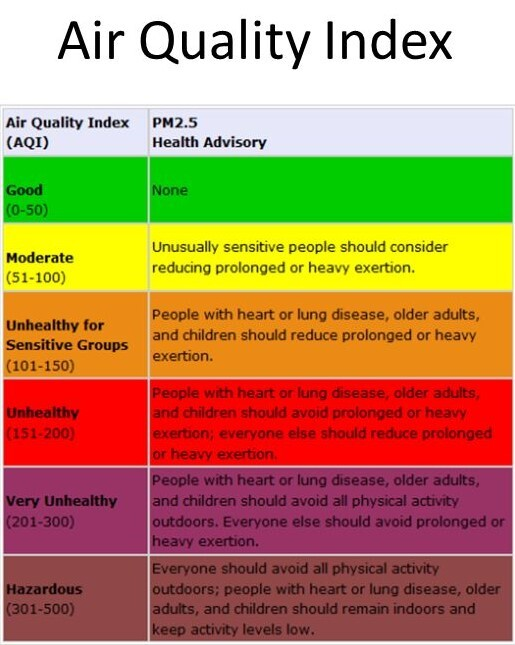

In [32]:
# Let's add a categorical column in regards to the PM2.5 levels 
# for easier and comprehensive analysis
air_df['AQI'] = ''
# check if new column has been created
air_df.head()

,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,AQI
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,Jul,2021,89,50,40.78,
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,Jul,2021,89,50,40.09,
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,Jul,2021,89,50,37.93,
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,Jul,2021,89,50,33.18,
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,Jul,2021,89,50,37.84,


In [40]:
# Let's add values to the Air Quality Index(AQI) Column
# depending on the PM2.5 Levels
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=0)&(air_df['PM2.5_ATM_ug/m3']<=50), 'AQI'] = 'Good'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=51)&(air_df['PM2.5_ATM_ug/m3']<=100), 'AQI'] = 'Moderate'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=101)&(air_df['PM2.5_ATM_ug/m3']<=150), 'AQI'] = 'Unhealthy sensitive'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=151)&(air_df['PM2.5_ATM_ug/m3']<=200), 'AQI'] = 'Unhealthy'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=201)&(air_df['PM2.5_ATM_ug/m3']<=300), 'AQI'] = 'Very Unhealthy'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=301)&(air_df['PM2.5_ATM_ug/m3']<=500), 'AQI'] = 'Hazardous'


In [43]:
air_df.sample(10)

,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,AQI
21343,2021-08-28 07:21:06+00:00,2021-08-28,07:21:06,Aug,2021,83,66,90.13,Moderate
19051,2021-08-24 21:36:48+00:00,2021-08-24,21:36:48,Aug,2021,82,73,157.96,Unhealthy
40307,2021-09-27 05:46:36+00:00,2021-09-27,05:46:36,Sep,2021,80,74,173.71,Unhealthy
47110,2021-10-08 08:56:22+00:00,2021-10-08,08:56:22,Oct,2021,89,60,51.05,Moderate
1200,2021-07-28 16:29:11+00:00,2021-07-28,16:29:11,Jul,2021,94,38,42.27,Good
54055,2021-10-20 12:03:42+00:00,2021-10-20,12:03:42,Oct,2021,95,47,38.30,Good
15734,2021-08-19 10:55:23+00:00,2021-08-19,10:55:23,Aug,2021,82,67,39.29,Good
12559,2021-08-14 19:24:46+00:00,2021-08-14,19:24:46,Aug,2021,86,61,55.70,Moderate
17764,2021-08-22 21:50:10+00:00,2021-08-22,21:50:10,Aug,2021,85,66,107.85,Unhealthy sensitive
47646,2021-10-09 04:41:19+00:00,2021-10-09,04:41:19,Oct,2021,81,70,16.14,Good


## Exploratory Data Analysis

### Univariate Analysis

As we examine the shape of our data, we will perform univariate analysis.

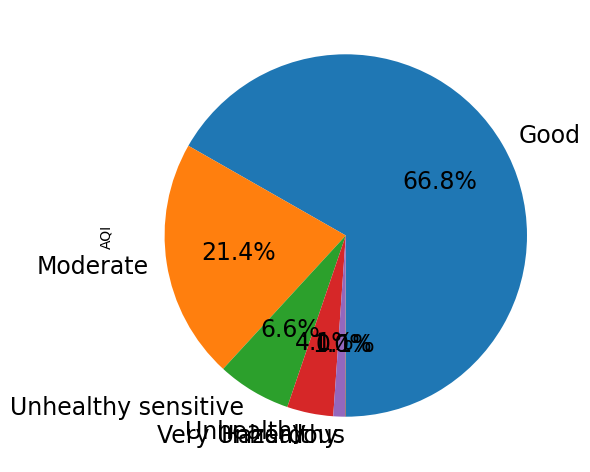

In [48]:
# Let's examine the Air quality index column
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)

Value = air_df.AQI.value_counts()

Value.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

From the pie chart we can see 66.8% of the air quality is in the **Good** index. However 33.2% falls short. 

Lets create  a better visualization of this.

In [60]:
# Using a bar plot to visualize
# creating the bar plot
# Counting the occurrences of each unique category
GroupData=air_df.groupby(by='AQI').size()
print(GroupData)

AQI
Good                   37417
Hazardous                 35
Moderate               12003
Unhealthy               2311
Unhealthy sensitive     3701
Very Unhealthy           585
dtype: int64


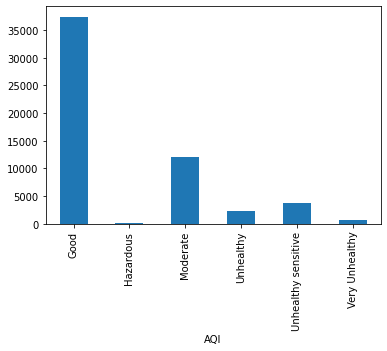

In [61]:
# Generating a bar chart for a single column
GroupData.plot.bar()

The air quality has mostly  been good over time. 

The air quality has rarely been hazrdous as seen from the plot.

### Bivariate Analysis

In [ ]:
# Lets evaluate the realtionship between Temperature and Humidity


In [ ]:
# Lets evaluate the realtionship between Temperature and PM2.5


In [ ]:
# Lets evaluate the realtionship between PM2.5 and Humidity


In [ ]:
# Evaluate the AQI categories in relation to the months